# Importing Python libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import yfinance as yf
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from prettytable import PrettyTable
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Flatten, Reshape
import tensorflow as tf
from tensorflow.keras.layers import GRU
from math import sqrt

tf.get_logger().setLevel('ERROR')

import warnings
warnings.filterwarnings("ignore")

In [4]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached h5py-3.12.1-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cac

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires protobuf<5,>=3.20, but you have protobuf 5.29.2 which is incompatible.


<div class="alert alert-block alert-success">  
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
<h1><center><strong>Stock Data</strong></center></h1>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
        
</div>

# ------------------------------------------------------------------------------------------------------

# Calling the data from api

In [8]:
# Get the data for the specific ticker
data = yf.Ticker("000679.SZ")

# Fetch data for the specific date range
data = data.history(start="2019-12-07", end="2024-12-06")

# ------------------------------------------------------------------------------------------------------

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [14]:
data.head() # showing the first 5 rows of data

Open  High   Low  Close   Volume  Dividends  \
Date                                                                     
2019-12-09 00:00:00+08:00  3.82  3.85  3.75   3.83  4370700        0.0   
2019-12-10 00:00:00+08:00  3.75  3.79  3.66   3.71  6173064        0.0   
2019-12-11 00:00:00+08:00  3.70  3.71  3.59   3.65  7819809        0.0   
2019-12-12 00:00:00+08:00  3.64  3.64  3.59   3.59  2831956        0.0   
2019-12-13 00:00:00+08:00  3.59  3.66  3.59   3.66  3179043        0.0   

                           Stock Splits  
Date                                     
2019-12-09 00:00:00+08:00           0.0  
2019-12-10 00:00:00+08:00           0.0  
2019-12-11 00:00:00+08:00           0.0  
2019-12-12 00:00:00+08:00           0.0  
2019-12-13 00:00:00+08:00           0.0

### Five last records of data

In [16]:
data.tail() # showing the last 5 rows of data

Open  High   Low  Close    Volume  Dividends  \
Date                                                                      
2024-11-29 00:00:00+08:00  5.10  5.61  4.88   5.61  49978272        0.0   
2024-12-02 00:00:00+08:00  5.55  6.17  5.38   6.08  76359872        0.0   
2024-12-03 00:00:00+08:00  5.70  5.92  5.55   5.67  47509300        0.0   
2024-12-04 00:00:00+08:00  5.55  5.90  5.42   5.69  35355138        0.0   
2024-12-05 00:00:00+08:00  5.56  5.86  5.54   5.82  31177852        0.0   

                           Stock Splits  
Date                                     
2024-11-29 00:00:00+08:00           0.0  
2024-12-02 00:00:00+08:00           0.0  
2024-12-03 00:00:00+08:00           0.0  
2024-12-04 00:00:00+08:00           0.0  
2024-12-05 00:00:00+08:00           0.0

### Coloumns/features in data

In [18]:
data.columns #columns in data

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

### Length of data

In [21]:
print('lenght of data is', len(data)) #lenght of data

lenght of data is 1211


### Shape of data

In [25]:
data.shape #shape of data

(1211, 7)

### Data information

In [28]:
data.info() #information of data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1211 entries, 2019-12-09 00:00:00+08:00 to 2024-12-05 00:00:00+08:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1211 non-null   float64
 1   High          1211 non-null   float64
 2   Low           1211 non-null   float64
 3   Close         1211 non-null   float64
 4   Volume        1211 non-null   int64  
 5   Dividends     1211 non-null   float64
 6   Stock Splits  1211 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 75.7 KB


### Data types of all coloumns

In [31]:
data.dtypes #data types of data

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

### Checking missing Values

In [34]:
data[data.isnull().any(axis=1)].head() #checking the null values

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []

### Count of missing values

In [38]:
np.sum(data.isnull().any(axis=1)) #checking the null values

0

### Is there any missing values?

In [41]:
data.isnull().values.any() #checking the null values

False

### Counts of missing values in each column

In [43]:
data.isnull().sum() #checking the null values columns wise

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Data Description

In [47]:
data.describe() # statics of data

Open         High          Low        Close        Volume  \
count  1211.000000  1211.000000  1211.000000  1211.000000  1.211000e+03   
mean      4.224955     4.327746     4.138150     4.234021  9.271757e+06   
std       0.974749     1.005258     0.950228     0.973106  1.220358e+07   
min       2.220000     2.410000     2.200000     2.230000  0.000000e+00   
25%       3.530000     3.600000     3.460000     3.530000  2.404768e+06   
50%       4.070000     4.160000     3.980000     4.090000  4.872001e+06   
75%       4.975000     5.090000     4.880000     4.970000  1.025050e+07   
max       8.380000     8.380000     7.620000     7.620000  8.695746e+07   

       Dividends  Stock Splits  
count     1211.0        1211.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0           0.0

### Spliting date into day, month and year

In [49]:
data['date'] = data.index # taking dates in date column
data['Month'] = data['date'].dt.month # extracting months from data
data['Day'] = data['date'].dt.day # extracting day from data
data['Year'] = data['date'].dt.year # extracting year from data

### Close price with respect to year

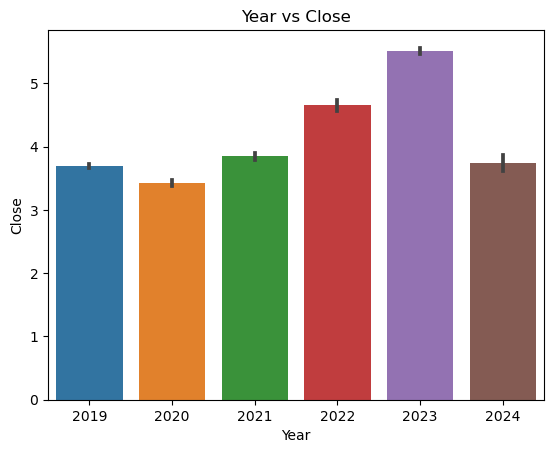

In [52]:
sns.barplot(x='Year', y='Close', data=data).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot

### Close price with respect to Month

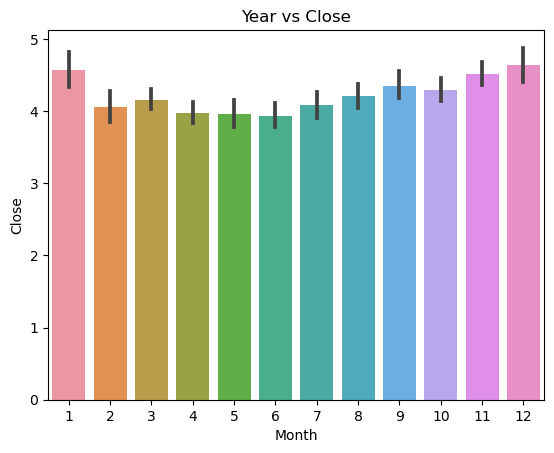

In [55]:
sns.barplot(x='Month', y='Close', data=data).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

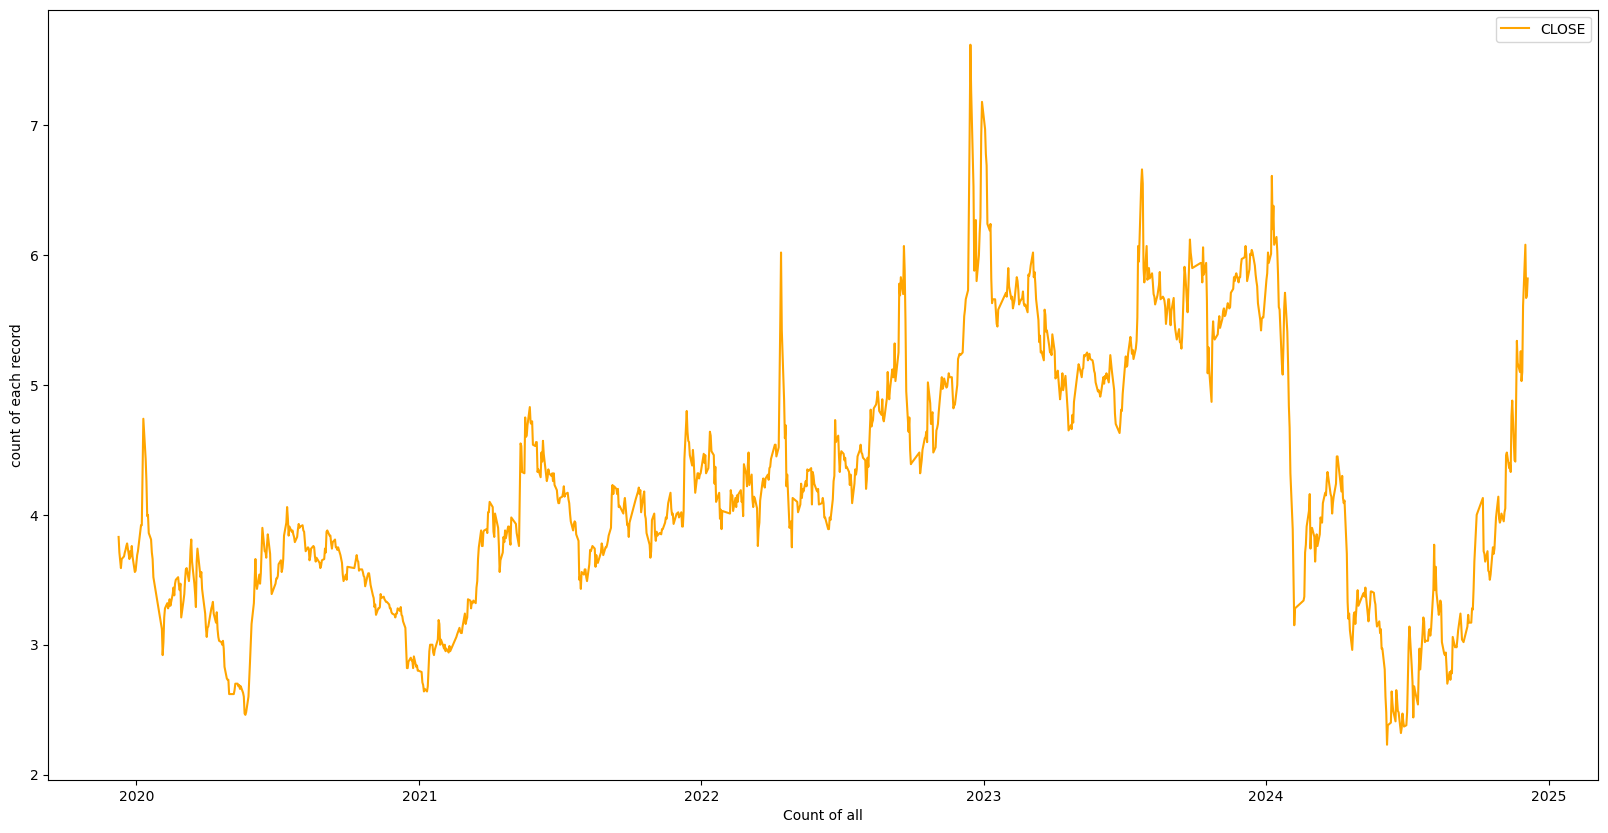

In [60]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot
plt.subplot(1,1,1) #plot setting
plt.plot(data.index, data['Close'].values,color='orange',label='CLOSE') # plotting Close price
plt.xlabel('Count of all') # x axis
plt.ylabel('count of each record') # y axis
plt.legend(loc='best') #legend name as Close
plt.show() # showing the plot

# ------------------------------------------------------------------------------------------------------

# Data Preparation and Feature Extraction

# ------------------------------------------------------------------------------------------------------

### stochastic features

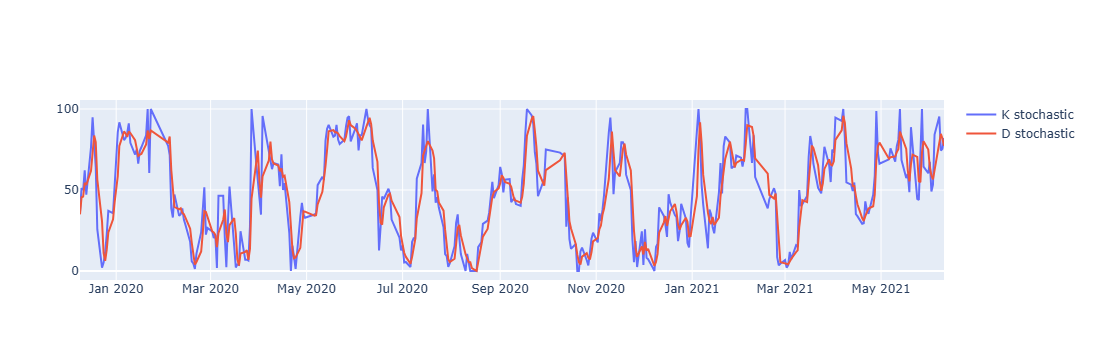

In [66]:
def stochastic(df, k, d): #start building stochastic function
    low_min  = df['Low'].rolling(window=k).min() #calculating the rolling window  with minimum numbers
    high_max = df['High'].rolling( window=k).max() #calculating the rolling window  with maximum numbers
    df['stochastic_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min) # calculating stochastic_k
    df['stochastic_d'] = df['stochastic_k'].rolling(window=d).mean() # calculating stochastic_d
    return df #retrun the results

stochs = stochastic(data, k=14, d=3) #calling stochastic function above
fig = go.Figure() #setting the plot
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_k.tail(365), name='K stochastic')) #plotting stochastic_k
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_d.tail(365), name='D stochastic')) # plotting stochastic_d
fig.show() # showing the plot

### EMA, MACD, MACD signal line features
- The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA. The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line

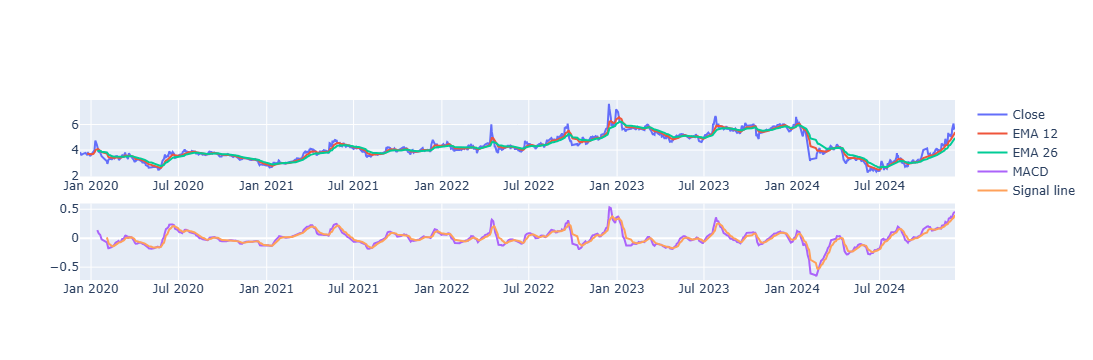

In [68]:
EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())  #calculating the mean span 12 of close
EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean()) #calculating the mean span 26 of close
MACD = pd.Series(EMA_12 - EMA_26) #calculating the MACD
data['MACD']=pd.Series(EMA_12 - EMA_26) # taking MACD in data
MACD_signal = pd.Series(MACD.ewm(span=9, min_periods=9).mean()) # macd signal
fig = make_subplots(rows=2, cols=1) #setting plot
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close'), row=1, col=1) # plotting Close
fig.add_trace(go.Scatter(x=data.index, y=EMA_12, name='EMA 12'), row=1, col=1)  #plotting ema12
fig.add_trace(go.Scatter(x=data.index, y=EMA_26, name='EMA 26'), row=1, col=1)  #plotting ema 26
fig.add_trace(go.Scatter(x=data.index, y=MACD, name='MACD'), row=2, col=1)  #plotting macd
fig.add_trace(go.Scatter(x=data.index, y=MACD_signal, name='Signal line'), row=2, col=1)  #plotting signal line
fig.show() #showing the plot

### Moving average features

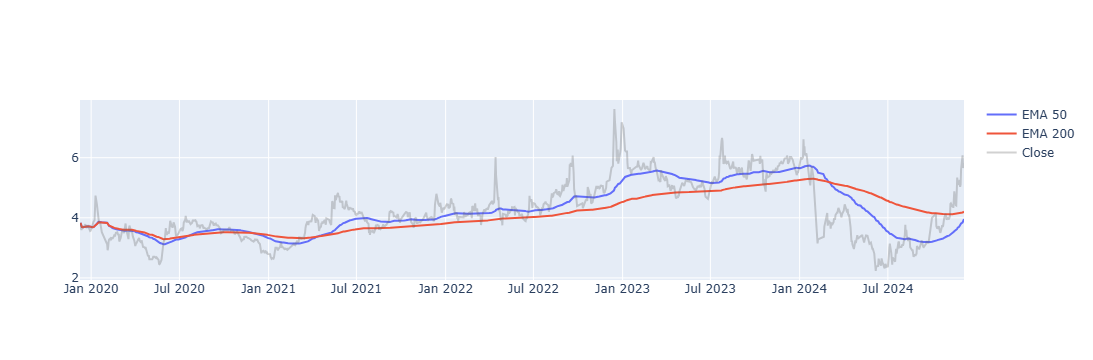

In [70]:
data['EMA_50'] = data['Close'].ewm(50).mean().shift() # calculting the ema 50
data['EMA_200'] =data['Close'].ewm(200).mean().shift() # calculting the ema 200
data['MA_50'] = data['Close'].rolling(50).mean() # calculting the ma 50
data['MA_200'] = data['Close'].rolling(200).mean() # calculting the ma 200
fig = go.Figure() #plot setting
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50')) # plotting the ema 50
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200')) # plotting the ema 200
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3)) # plotting the close
fig.show() #showing the plot

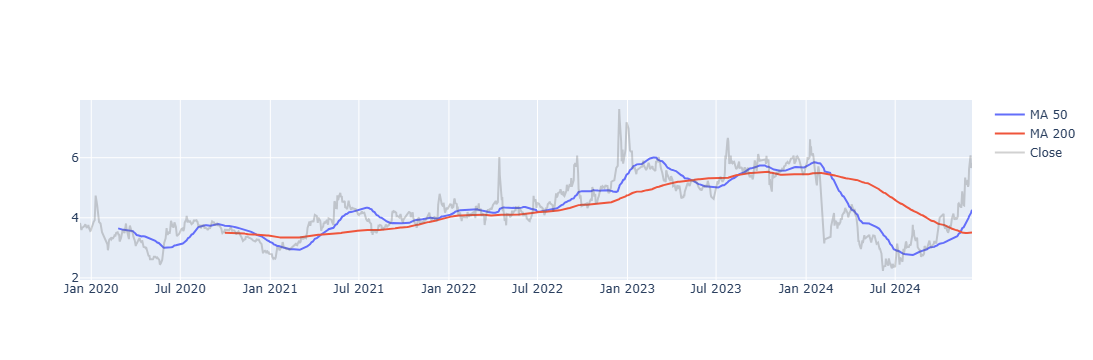

In [71]:
fig = go.Figure() #plot setting
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50')) # plotting the ma 50
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200')) # plotting the ma 200
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3)) # plotting the close
fig.show() # showing plot

### Relative Strength Index RSI 7

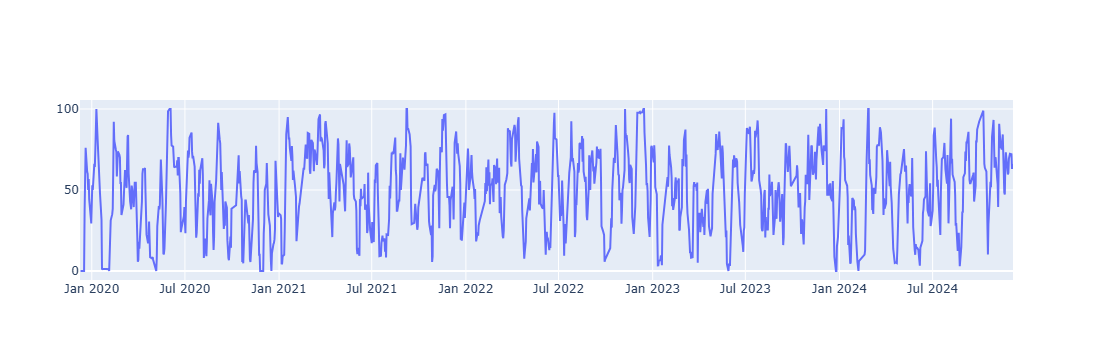

In [73]:
def RSI(data, n=7): #built RSI function
    close = data['Close'] #calling the close price
    delta = close.diff() #tak9ing the difference of daily prices
    delta = delta[1:] # taking all the difrrence values in the close
    pricesUp = delta.copy() #taking copy as up prices
    pricesDown = delta.copy() #taking copy as down prices
    pricesUp[pricesUp < 0] = 0 # making less than 0 value as 0
    pricesDown[pricesDown > 0] = 0 # making greater than 0 value as 0
    rollUp = pricesUp.rolling(n).mean() #taking rolling mean over 7 days of up
    rollDown = pricesDown.abs().rolling(n).mean() #taking rolling mean over 7 days of down
    rs = rollUp / rollDown #calculating RS
    rsi = 100.0 - (100.0 / (1.0 + rs)) #calculating RSI
    return rsi #return the results

data['RSI 7'] = RSI(data).fillna(0) # calling the above function and taking RSI 7
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 7'])) #plotting the RSI 7
fig.show() #howing the plot

# Calculating P/E Ratio

In [75]:
#Since we dont have EPS data from the stock so we are using Volume inplace of EPS
#We would be using this formula if we had EPS data
#data['P/E Ratio'] = data['Close'] / data['EPS']
data['P/E Ratio'] = data['Close'] / (data['Volume'] / 1e6 + 1)

In [77]:
data['P/E Ratio']

Date
2019-12-09 00:00:00+08:00    0.713129
2019-12-10 00:00:00+08:00    0.517213
2019-12-11 00:00:00+08:00    0.413841
2019-12-12 00:00:00+08:00    0.936858
2019-12-13 00:00:00+08:00    0.875799
                               ...   
2024-11-29 00:00:00+08:00    0.110047
2024-12-02 00:00:00+08:00    0.078594
2024-12-03 00:00:00+08:00    0.116885
2024-12-04 00:00:00+08:00    0.156512
2024-12-05 00:00:00+08:00    0.180870
Name: P/E Ratio, Length: 1211, dtype: float64

# Number of transactions

In [79]:
data['Num_Transactions'] = data['Volume'] / 100
data['Num_Transactions']

Date
2019-12-09 00:00:00+08:00     43707.00
2019-12-10 00:00:00+08:00     61730.64
2019-12-11 00:00:00+08:00     78198.09
2019-12-12 00:00:00+08:00     28319.56
2019-12-13 00:00:00+08:00     31790.43
                               ...    
2024-11-29 00:00:00+08:00    499782.72
2024-12-02 00:00:00+08:00    763598.72
2024-12-03 00:00:00+08:00    475093.00
2024-12-04 00:00:00+08:00    353551.38
2024-12-05 00:00:00+08:00    311778.52
Name: Num_Transactions, Length: 1211, dtype: float64

# Profitability

In [81]:
data['Profitability'] = data['Close'].pct_change().fillna(0)
data['Profitability']

Date
2019-12-09 00:00:00+08:00    0.000000
2019-12-10 00:00:00+08:00   -0.031332
2019-12-11 00:00:00+08:00   -0.016172
2019-12-12 00:00:00+08:00   -0.016438
2019-12-13 00:00:00+08:00    0.019499
                               ...   
2024-11-29 00:00:00+08:00    0.100000
2024-12-02 00:00:00+08:00    0.083779
2024-12-03 00:00:00+08:00   -0.067434
2024-12-04 00:00:00+08:00    0.003527
2024-12-05 00:00:00+08:00    0.022847
Name: Profitability, Length: 1211, dtype: float64

# Final Data after features extraction and preparation

In [83]:
data=data.tail(len(data)-200) # ignoring the first 200 rows as there are Nan/missing values
data #data

Open  High   Low  Close    Volume  Dividends  \
Date                                                                      
2020-10-09 00:00:00+08:00  3.58  3.63  3.57   3.59    839400        0.0   
2020-10-12 00:00:00+08:00  3.58  3.69  3.58   3.69   1413750        0.0   
2020-10-13 00:00:00+08:00  3.65  3.67  3.64   3.65    808901        0.0   
2020-10-14 00:00:00+08:00  3.64  3.68  3.64   3.64    941600        0.0   
2020-10-15 00:00:00+08:00  3.65  3.65  3.57   3.57   1126900        0.0   
...                         ...   ...   ...    ...       ...        ...   
2024-11-29 00:00:00+08:00  5.10  5.61  4.88   5.61  49978272        0.0   
2024-12-02 00:00:00+08:00  5.55  6.17  5.38   6.08  76359872        0.0   
2024-12-03 00:00:00+08:00  5.70  5.92  5.55   5.67  47509300        0.0   
2024-12-04 00:00:00+08:00  5.55  5.90  5.42   5.69  35355138        0.0   
2024-12-05 00:00:00+08:00  5.56  5.86  5.54   5.82  31177852        0.0   

                           Stock Splits                      date  Month  Day  \
Date                                                                            
2020-10-09 00:00:00+08:00           0.0 2020-10-09 00:00:00+08:00     10    9   
2020-10-12 00:00:00+08:00           0.0 2020-10-12 00:00:00+08:00     10   12   
2020-10-13 00:00:00+08:00           0.0 2020-10-13 00:00:00+08:00     10   13   
2020-10-14 00:00:00+08:00           0.0 2020-10-14 00:00:00+08:00     10   14   
2020-10-15 00:00:00+08:00           0.0 2020-10-15 00:00:00+08:00     10   15   
...                                 ...                       ...    ...  ...   
2024-11-29 00:00:00+08:00           0.0 2024-11-29 00:00:00+08:00     11   29   
2024-12-02 00:00:00+08:00           0.0 2024-12-02 00:00:00+08:00     12    2   
2024-12-03 00:00:00+08:00           0.0 2024-12-03 00:00:00+08:00     12    3   
2024-12-04 00:00:00+08:00           0.0 2024-12-04 00:00:00+08:00     12    4   
2024-12-05 00:00:00+08:00           0.0 2024-12-05 00:00:00+08:00     12    5   

                           ...  stochastic_d      MACD    EMA_50   EMA_200  \
Date                       ...                                               
2020-10-09 00:00:00+08:00  ...     22.430108 -0.051089  3.612850  3.521898   
2020-10-12 00:00:00+08:00  ...     41.308952 -0.041158  3.612393  3.522433   
2020-10-13 00:00:00+08:00  ...     50.736254 -0.036100  3.613943  3.523747   
2020-10-14 00:00:00+08:00  ...     60.579449 -0.032523  3.614663  3.524733   
2020-10-15 00:00:00+08:00  ...     51.102306 -0.034934  3.615169  3.525631   
...                        ...           ...       ...       ...       ...   
2024-11-29 00:00:00+08:00  ...     62.222236  0.378558  3.808854  4.169413   
2024-12-02 00:00:00+08:00  ...     77.653462  0.436364  3.844171  4.176598   
2024-12-03 00:00:00+08:00  ...     84.662009  0.443975  3.888010  4.186090   
2024-12-04 00:00:00+08:00  ...     81.709401  0.446473  3.922951  4.193491   
2024-12-05 00:00:00+08:00  ...     77.264962  0.453713  3.957599  4.200954   

                            MA_50   MA_200      RSI 7  P/E Ratio  \
Date                                                               
2020-10-09 00:00:00+08:00  3.7300  3.50170  40.540514   1.951723   
2020-10-12 00:00:00+08:00  3.7280  3.50160  56.818174   1.528742   
2020-10-13 00:00:00+08:00  3.7244  3.50160  64.102586   2.017800   
2020-10-14 00:00:00+08:00  3.7194  3.50185  71.428591   1.874743   
2020-10-15 00:00:00+08:00  3.7122  3.50140  54.054049   1.678499   
...                           ...      ...        ...        ...   
2024-11-29 00:00:00+08:00  4.0498  3.48665  72.352938   0.110047   
2024-12-02 00:00:00+08:00  4.1108  3.49125  72.023799   0.078594   
2024-12-03 00:00:00+08:00  4.1638  3.49540  63.020833   0.116885   
2024-12-04 00:00:00+08:00  4.2148  3.50050  65.775406   0.156512   
2024-12-05 00:00:00+08:00  4.2666  3.50800  65.217392   0.180870   

                           Num_Transactions  Profitability  
Date                                

# -----------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features

In [90]:
X=data.drop(columns=['Close','date','Volume', 'Dividends','Stock Splits']) #dropping the 'Close','date','Volume', 'Dividends','Stock Splits' features and others as input features
X[X< 0] = 0 #making all negative values as 0
X #input features

Open  High   Low  Month  Day  Year  stochastic_k  \
Date                                                                          
2020-10-09 00:00:00+08:00  3.58  3.63  3.57     10    9  2020     29.729711   
2020-10-12 00:00:00+08:00  3.58  3.69  3.58     10   12  2020     61.764733   
2020-10-13 00:00:00+08:00  3.65  3.67  3.64     10   13  2020     60.714319   
2020-10-14 00:00:00+08:00  3.64  3.68  3.64     10   14  2020     59.259295   
2020-10-15 00:00:00+08:00  3.65  3.65  3.57     10   15  2020     33.333304   
...                         ...   ...   ...    ...  ...   ...           ...   
2024-11-29 00:00:00+08:00  5.10  5.61  4.88     11   29  2024     84.242440   
2024-12-02 00:00:00+08:00  5.55  6.17  5.38     12    2  2024     95.384608   
2024-12-03 00:00:00+08:00  5.70  5.92  5.55     12    3  2024     74.358978   
2024-12-04 00:00:00+08:00  5.55  5.90  5.42     12    4  2024     75.384618   
2024-12-05 00:00:00+08:00  5.56  5.86  5.54     12    5  2024     82.051290   

                           stochastic_d      MACD    EMA_50   EMA_200   MA_50  \
Date                                                                            
2020-10-09 00:00:00+08:00     22.430108  0.000000  3.612850  3.521898  3.7300   
2020-10-12 00:00:00+08:00     41.308952  0.000000  3.612393  3.522433  3.7280   
2020-10-13 00:00:00+08:00     50.736254  0.000000  3.613943  3.523747  3.7244   
2020-10-14 00:00:00+08:00     60.579449  0.000000  3.614663  3.524733  3.7194   
2020-10-15 00:00:00+08:00     51.102306  0.000000  3.615169  3.525631  3.7122   
...                                 ...       ...       ...       ...     ...   
2024-11-29 00:00:00+08:00     62.222236  0.378558  3.808854  4.169413  4.0498   
2024-12-02 00:00:00+08:00     77.653462  0.436364  3.844171  4.176598  4.1108   
2024-12-03 00:00:00+08:00     84.662009  0.443975  3.888010  4.186090  4.1638   
2024-12-04 00:00:00+08:00     81.709401  0.446473  3.922951  4.193491  4.2148   
2024-12-05 00:00:00+08:00     77.264962  0.453713  3.957599  4.200954  4.2666   

                            MA_200      RSI 7  P/E Ratio  Num_Transactions  \
Date                                                                         
2020-10-09 00:00:00+08:00  3.50170  40.540514   1.951723           8394.00   
2020-10-12 00:00:00+08:00  3.50160  56.818174   1.528742          14137.50   
2020-10-13 00:00:00+08:00  3.50160  64.102586   2.017800           8089.01   
2020-10-14 00:00:00+08:00  3.50185  71.428591   1.874743           9416.00   
2020-10-15 00:00:00+08:00  3.50140  54.054049   1.678499          11269.00   
...                            ...        ...        ...               ...   
2024-11-29 00:00:00+08:00  3.48665  72.352938   0.110047         499782.72   
2024-12-02 00:00:00+08:00  3.49125  72.023799   0.078594         763598.72   
2024-12-03 00:00:00+08:00  3.49540  63.020833   0.116885         475093.00   
2024-12-04 00:00:00+08:00  3.50050  65.775406   0.156512         353551.38   
2024-12-05 00:00:00+08:00  3.50800  65.217392   0.180870         311778.52   

                           Profitability  
Date                                      
2020-10-09 00:00:00+08:00       0.000000  
2020-10-12 00:00:00+08:00       0.027855  
2020-10-13 00:00:00+08:00       0.000000  
2020-10-14 00:00:00+08:00       0.000000  
2020-10-15 00:00:00+08:00       0.000000  
...                                  ...  
2024-11-29 00:00:00+08:00       0.100000  
2024-12-02 00:00:00+08:00       0.083779  
2024-12-03 00:00:00+08:00       0.000000  
2024-12-04 00:00:00+08:00       0.003527  
2024-12-05 00:00:00+08:00       0.022847  

[1011 rows x 17 columns]

### Taking target as output

In [103]:
y=data['Close'] # output close
y #output

Date
2020-10-09 00:00:00+08:00    3.59
2020-10-12 00:00:00+08:00    3.69
2020-10-13 00:00:00+08:00    3.65
2020-10-14 00:00:00+08:00    3.64
2020-10-15 00:00:00+08:00    3.57
                             ... 
2024-11-29 00:00:00+08:00    5.61
2024-12-02 00:00:00+08:00    6.08
2024-12-03 00:00:00+08:00    5.67
2024-12-04 00:00:00+08:00    5.69
2024-12-05 00:00:00+08:00    5.82
Name: Close, Length: 1011, dtype: float64

# Normalize features with MinMaxScaler

In [106]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = np.array(y).reshape(-1, 1)
y = scaler_y.fit_transform(y).flatten()

# Model creation function with GRU and LSTM layers

In [109]:
def GRU_LSTM_Model(lstm_layers=1, gru_layers=1, input_shape=(None, 1)):
    model = Sequential()
    model.add(Input(shape=input_shape))

    # GRU Layers
    for _ in range(gru_layers):
        model.add(GRU(64, return_sequences=True, activation='relu'))

    # LSTM Layers
    for _ in range(lstm_layers - 1):
        model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))

    # Dense layer to output the final prediction
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# TimeSeriesSplit

In [112]:
tscv = TimeSeriesSplit(n_splits=5)
results = []

## Training and evaluating the model with TimeSeriesSplit

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 339ms/step


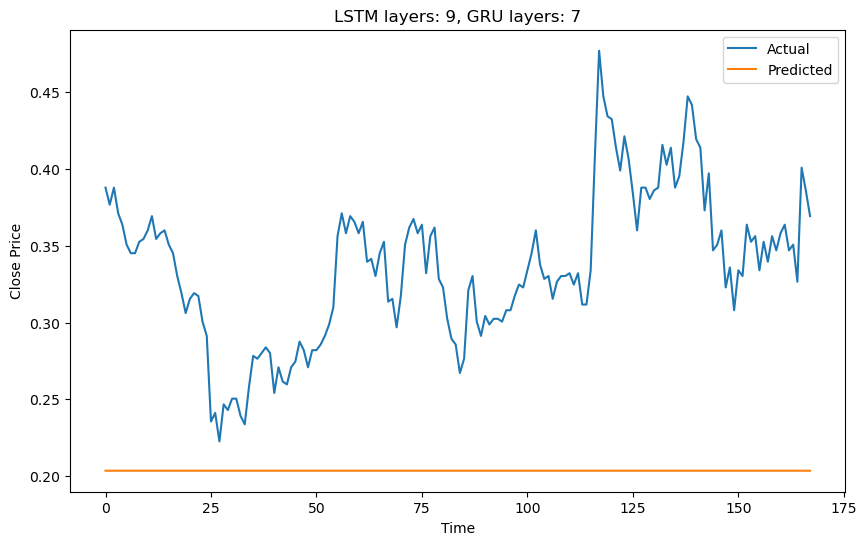

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step


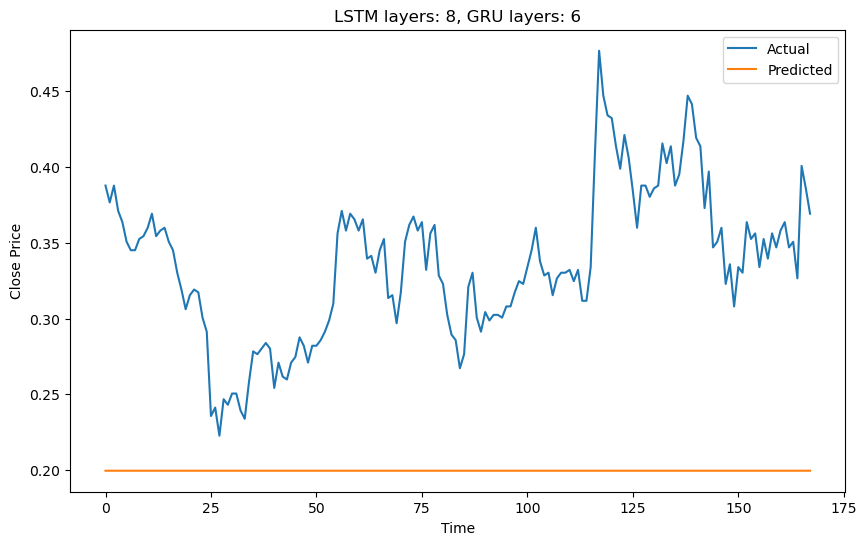

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step


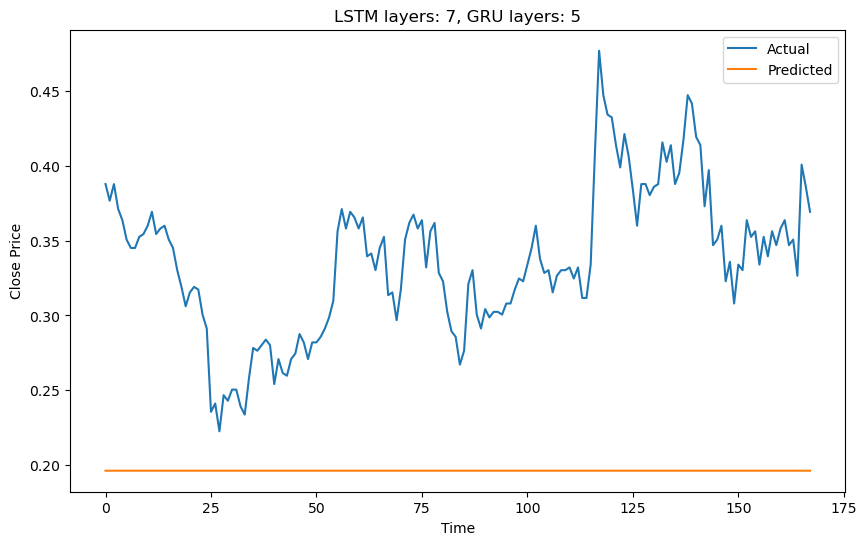

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step


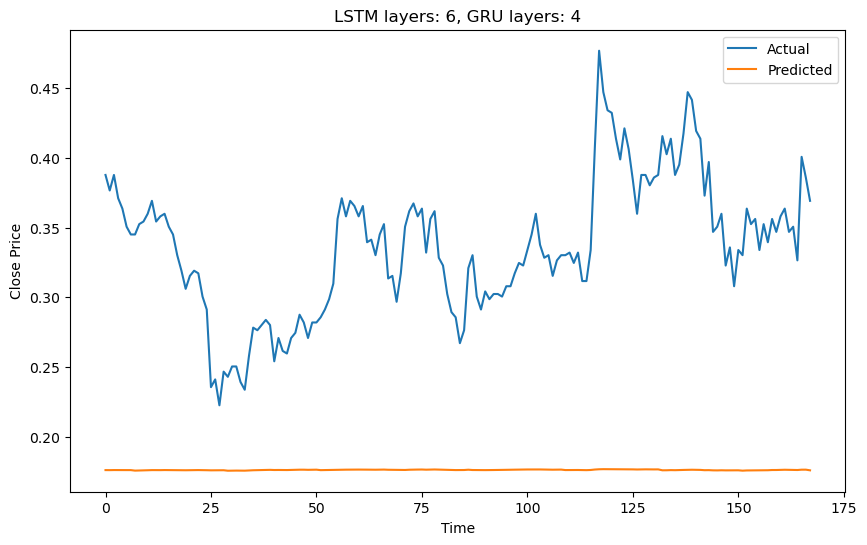

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step


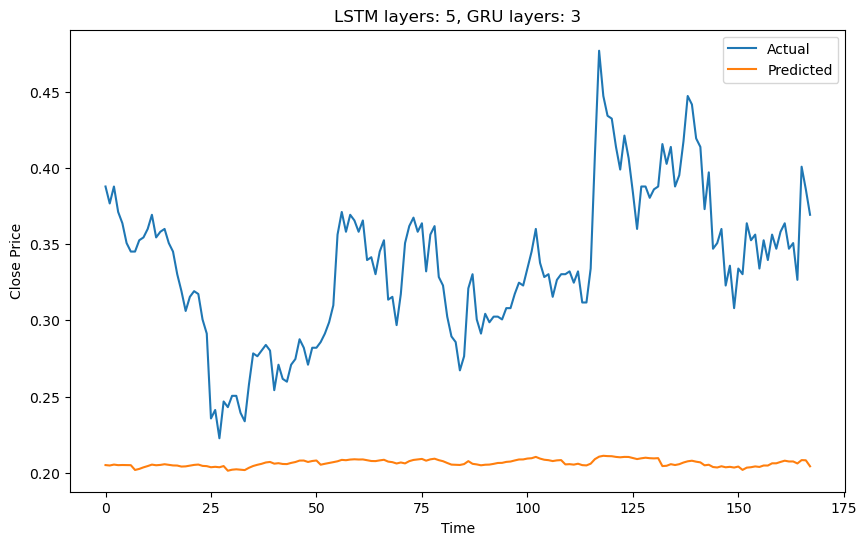

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


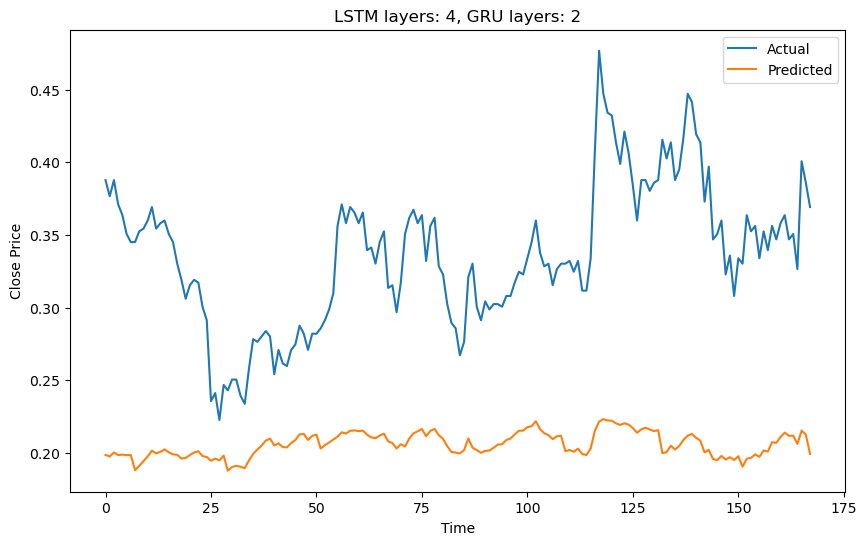

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


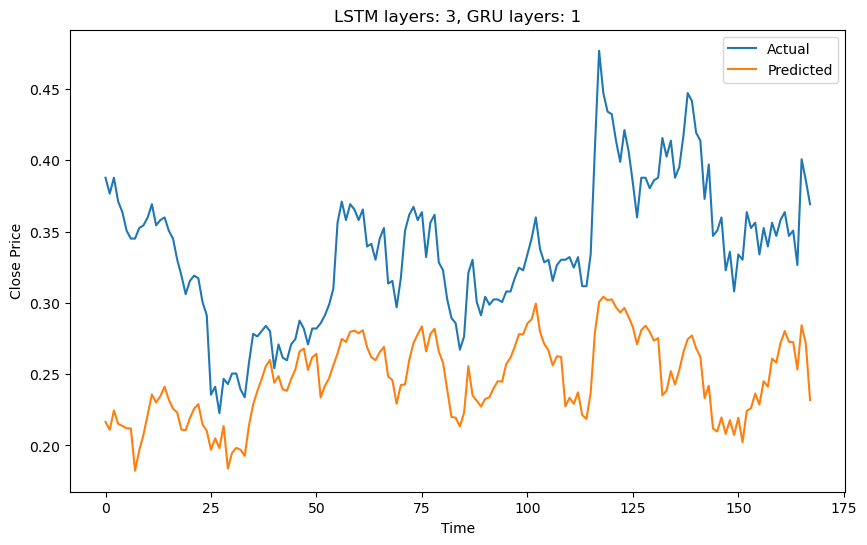

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step


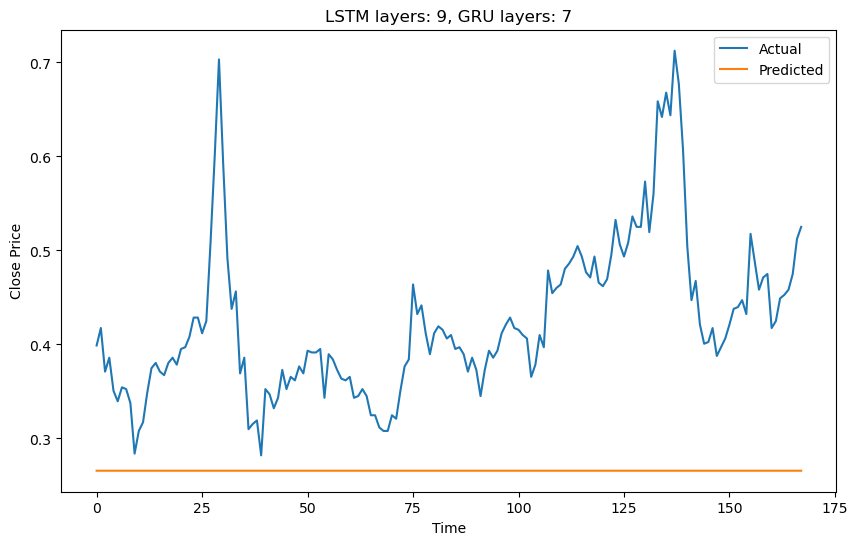

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 349ms/step


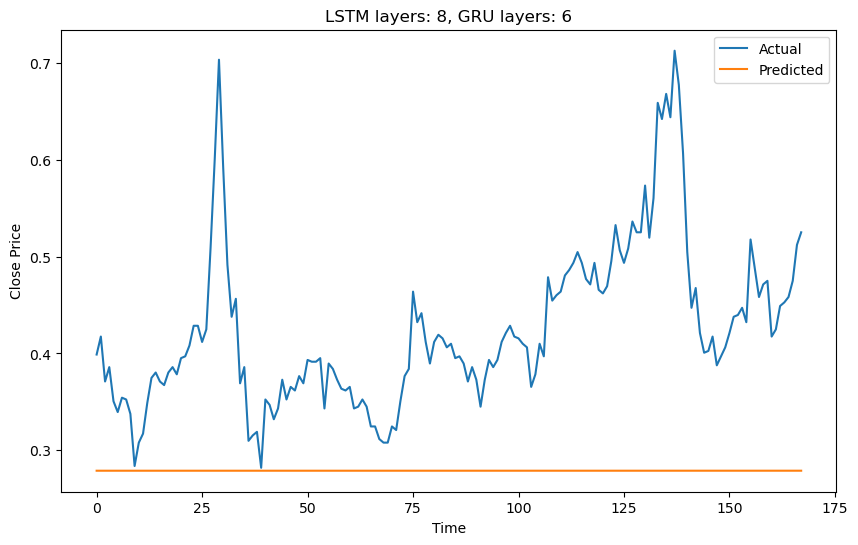

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step


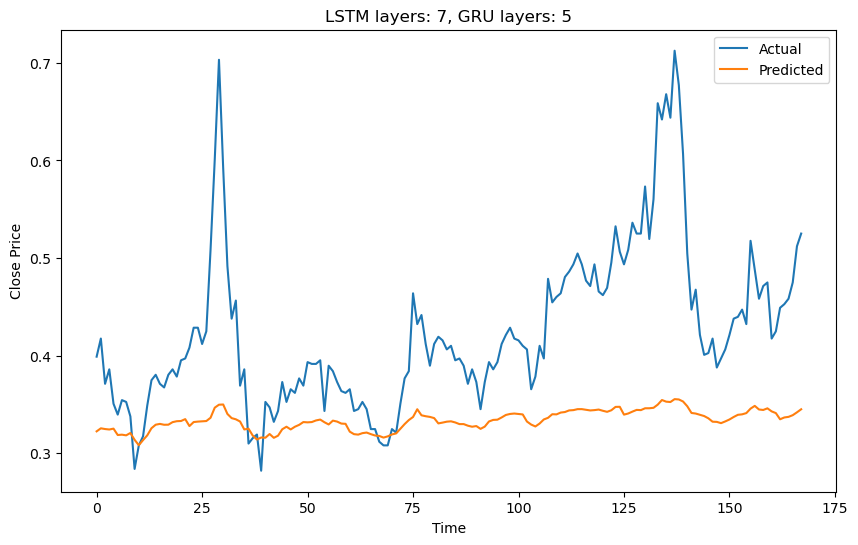

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step


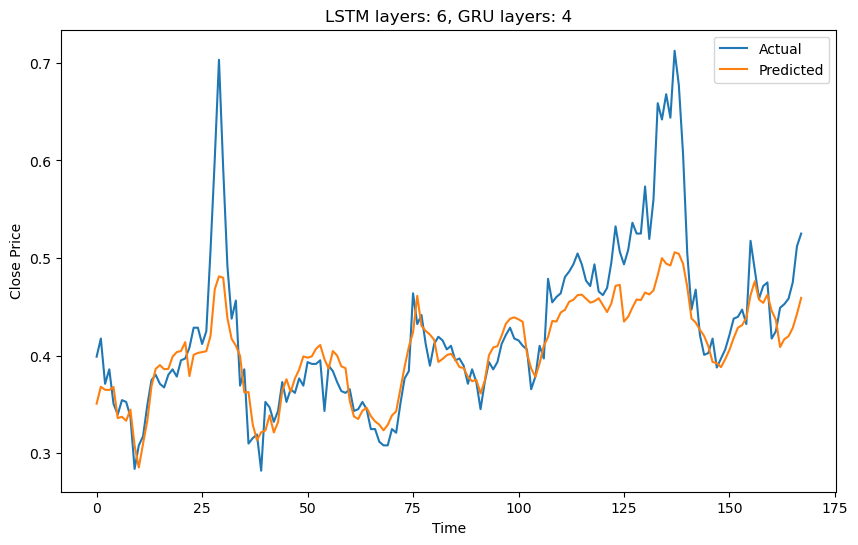

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step


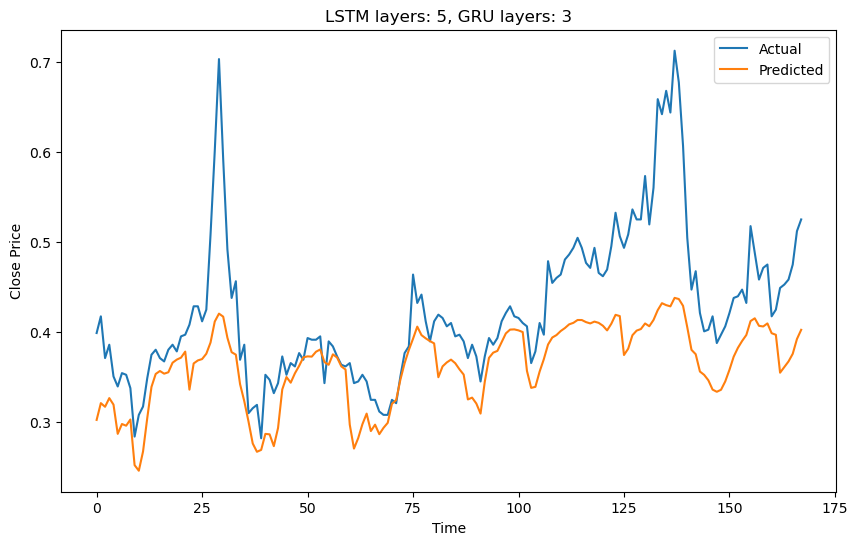

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


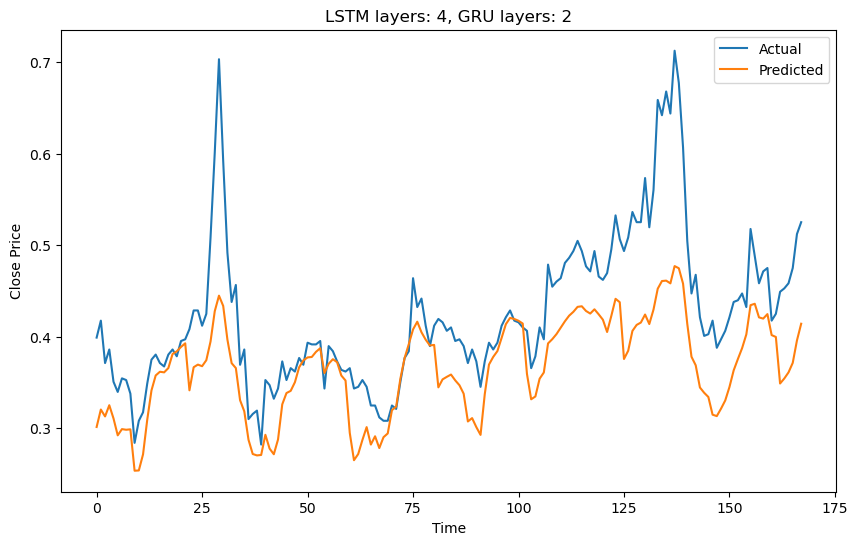

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


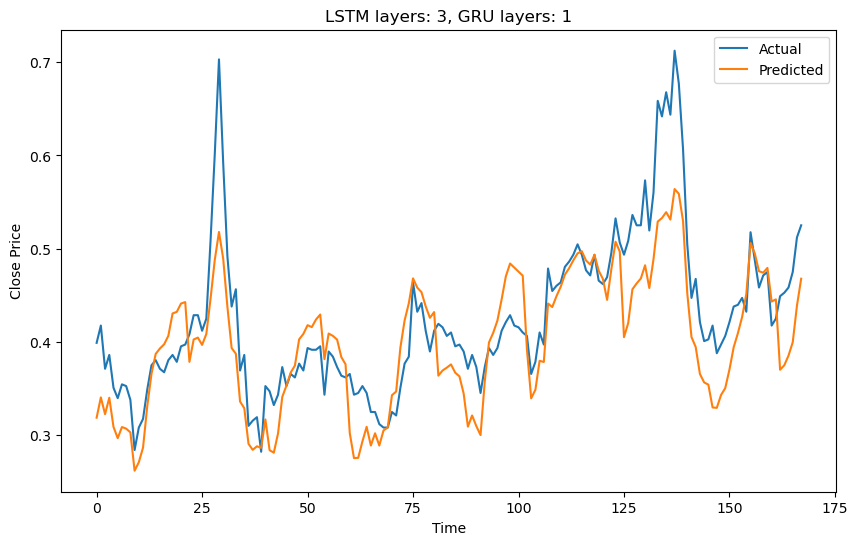

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step


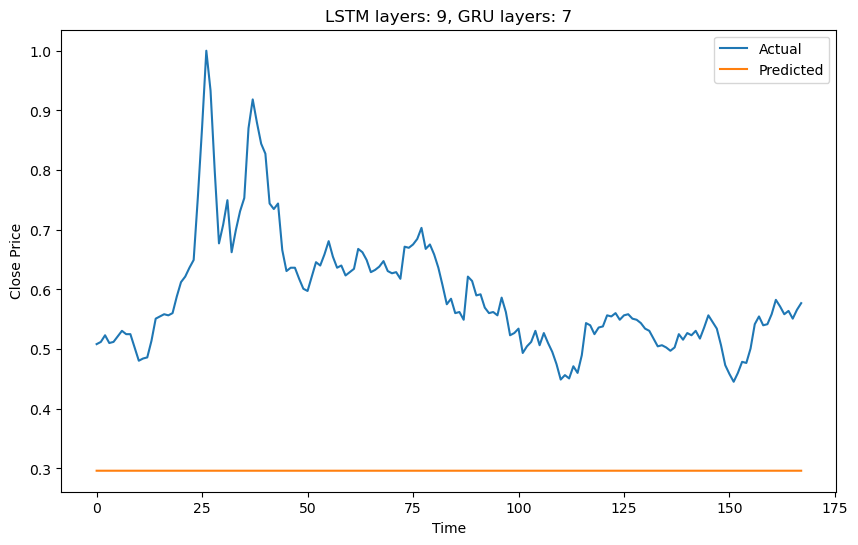

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step


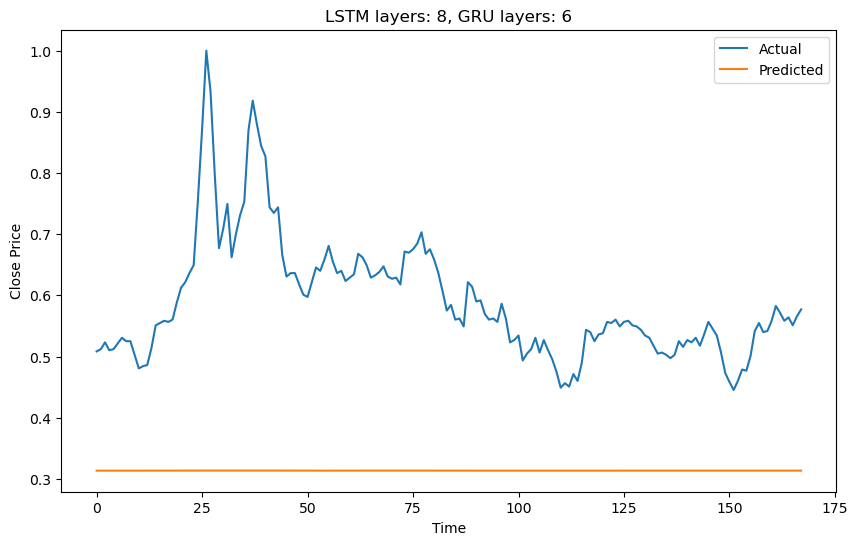

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step


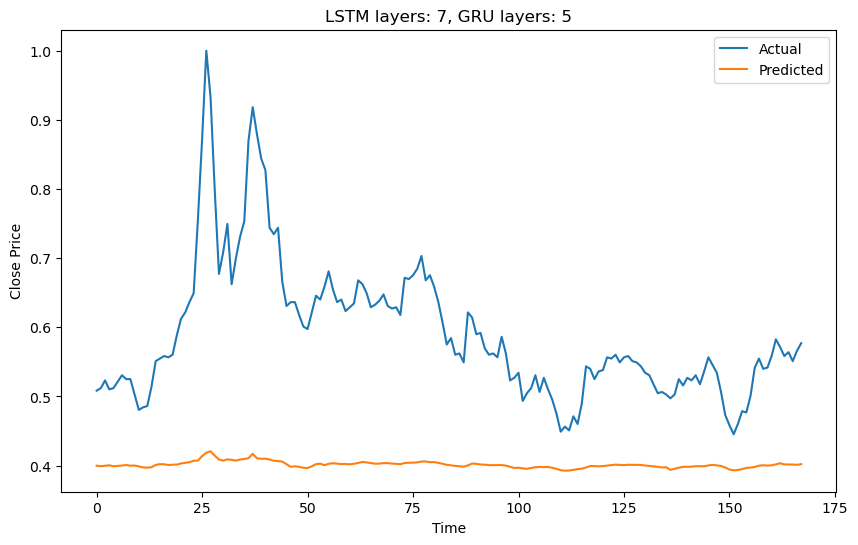

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step


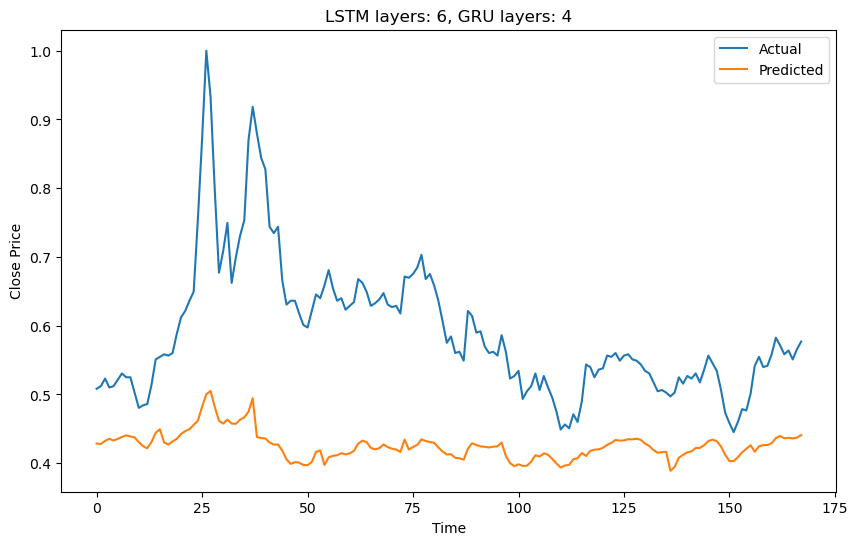

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step


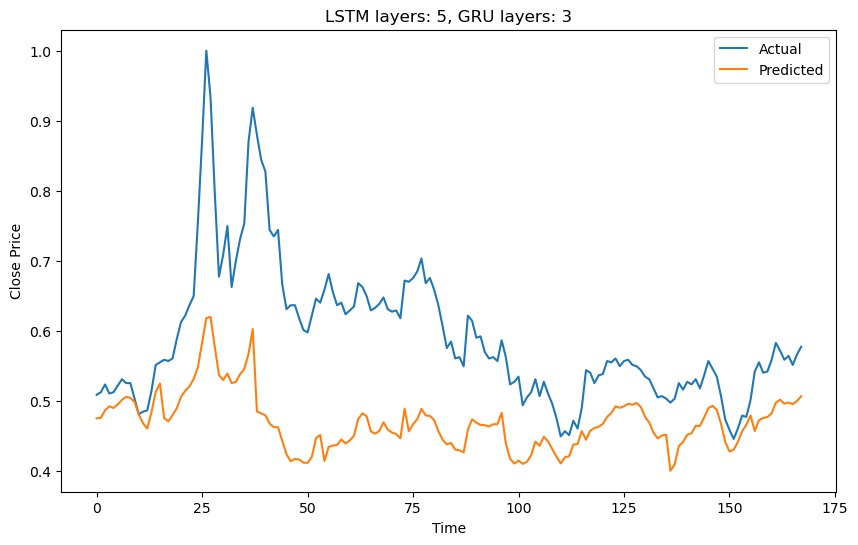

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


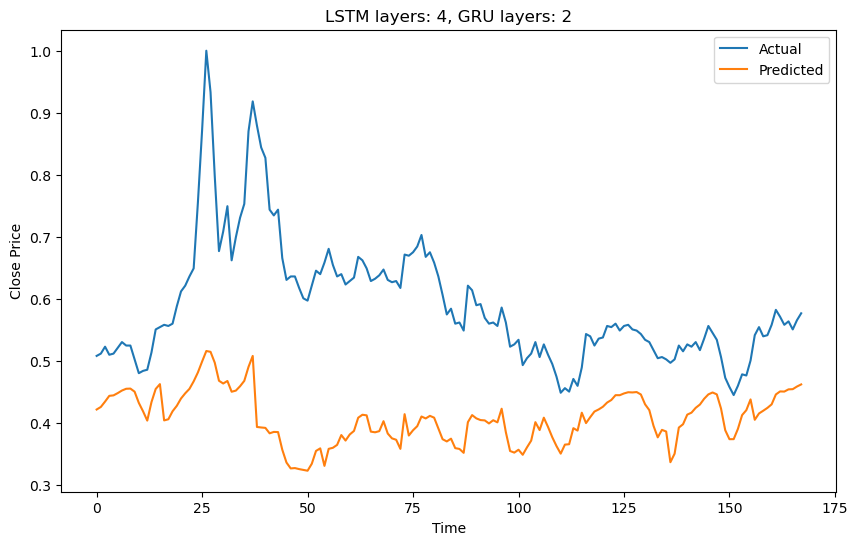

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


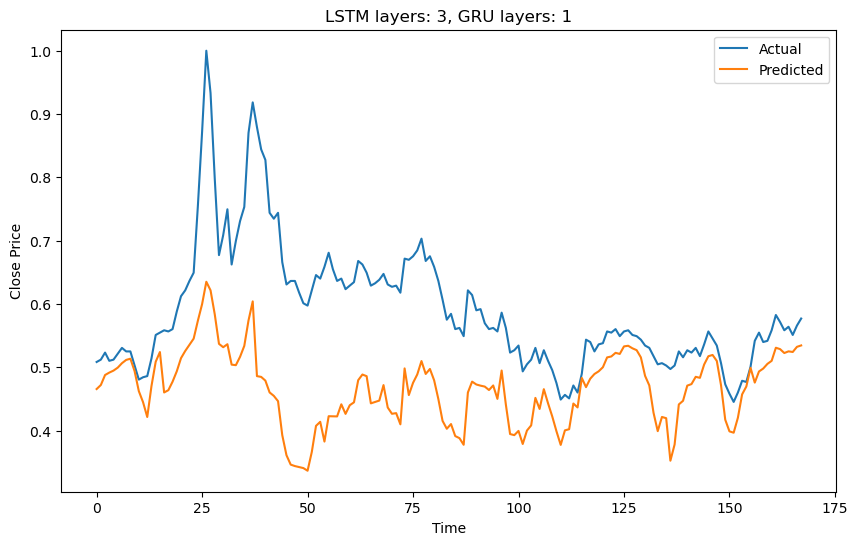

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step


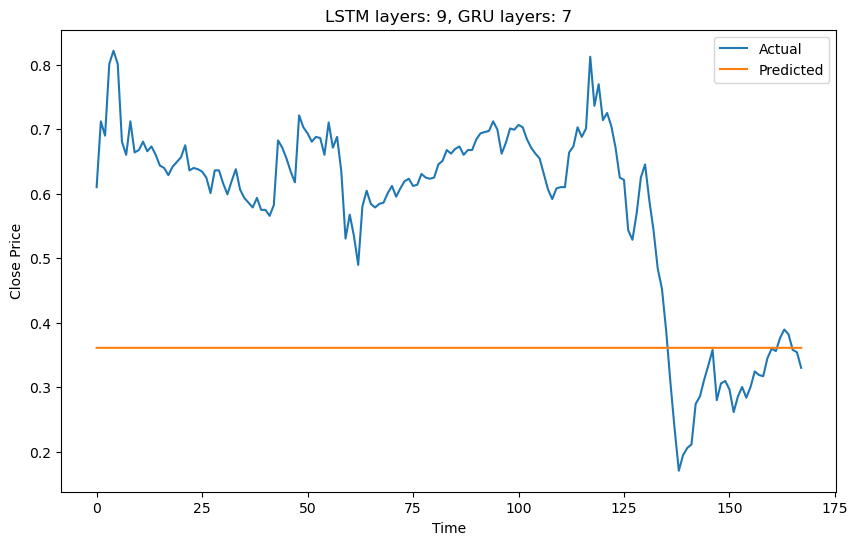

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step


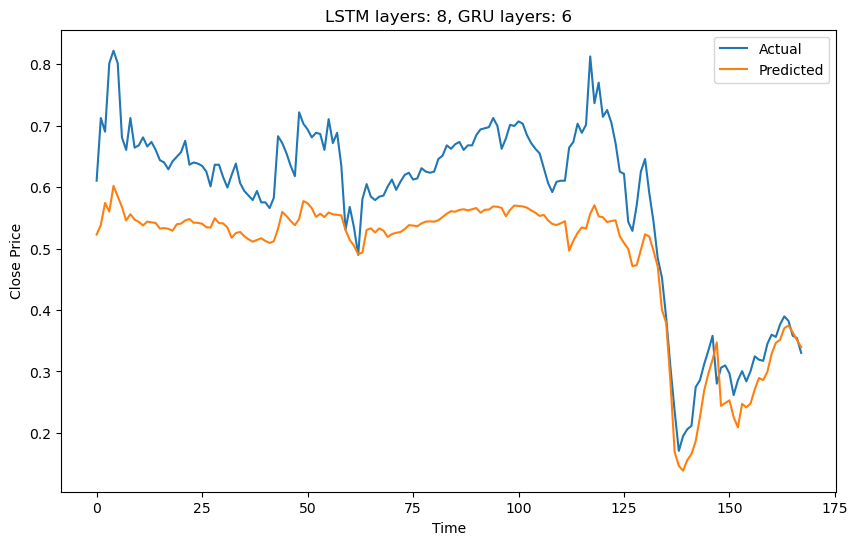

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step


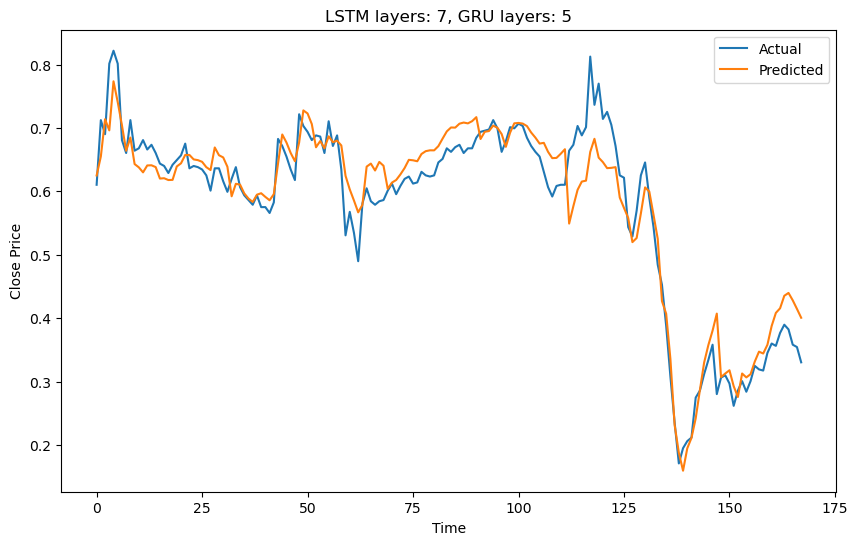

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step


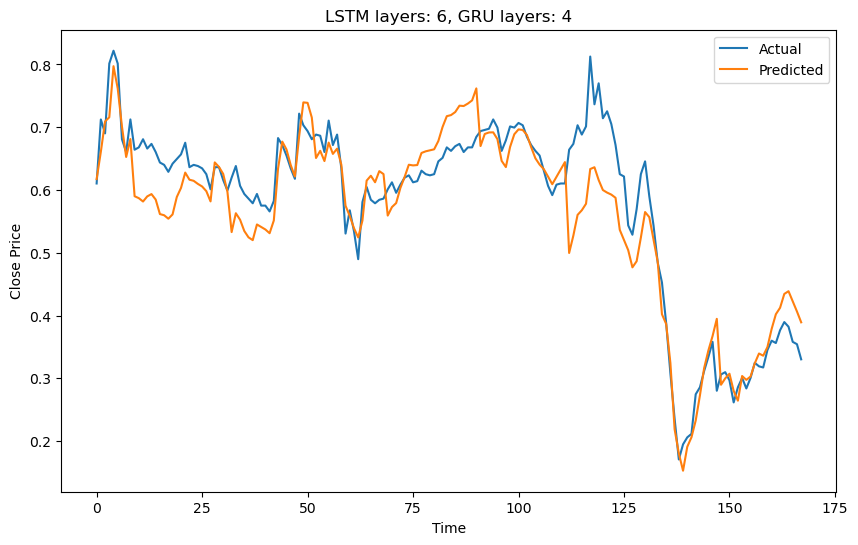

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step


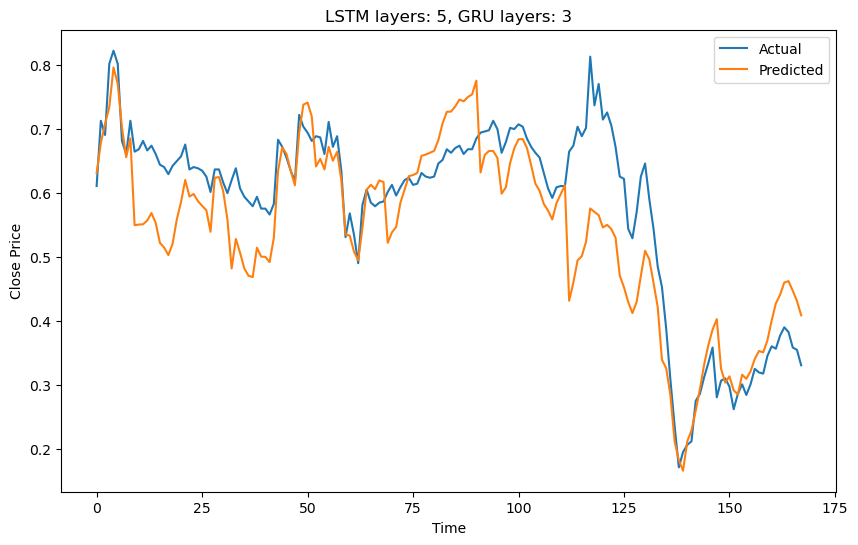

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


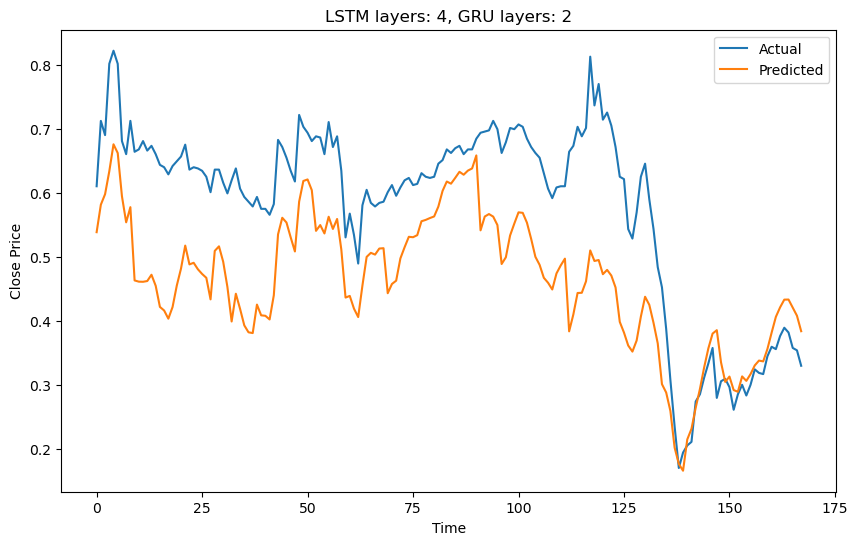

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 674ms/step


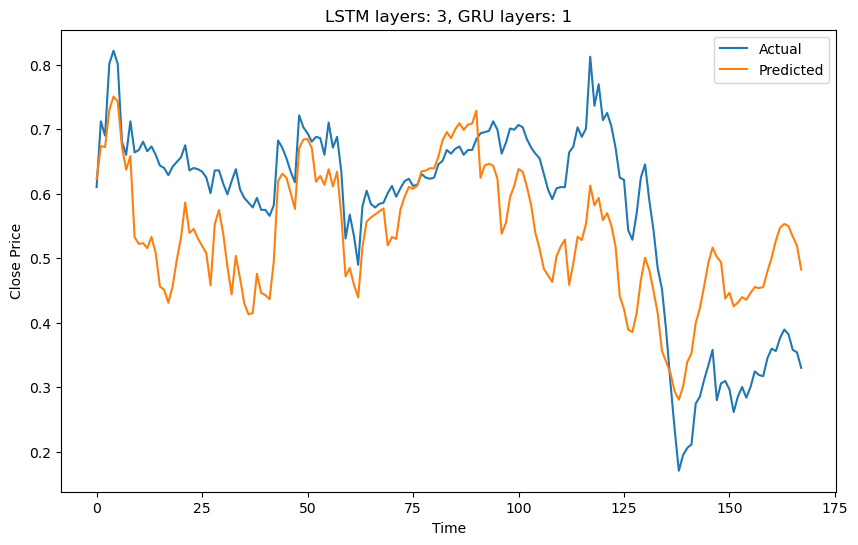

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step


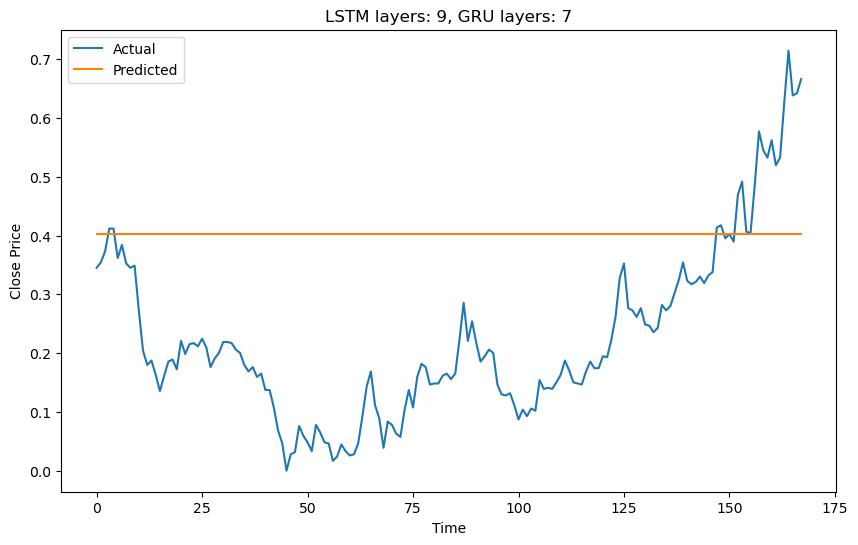

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step


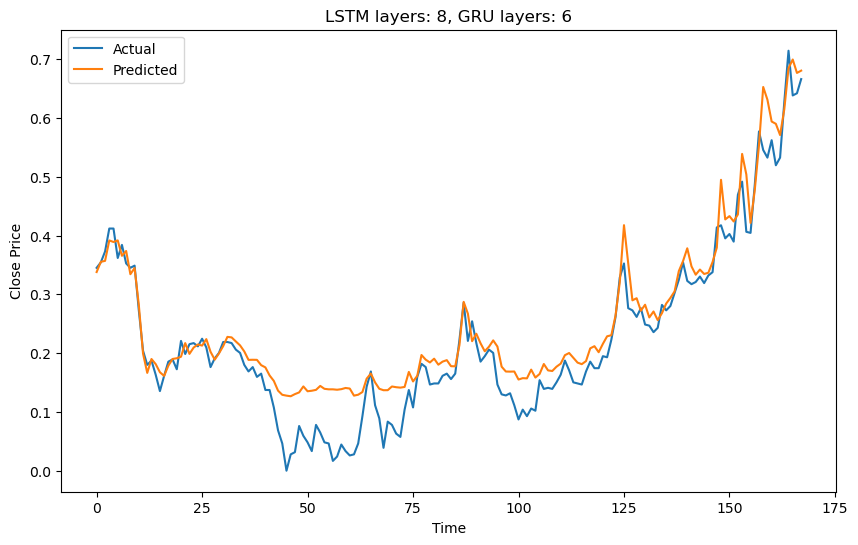

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step


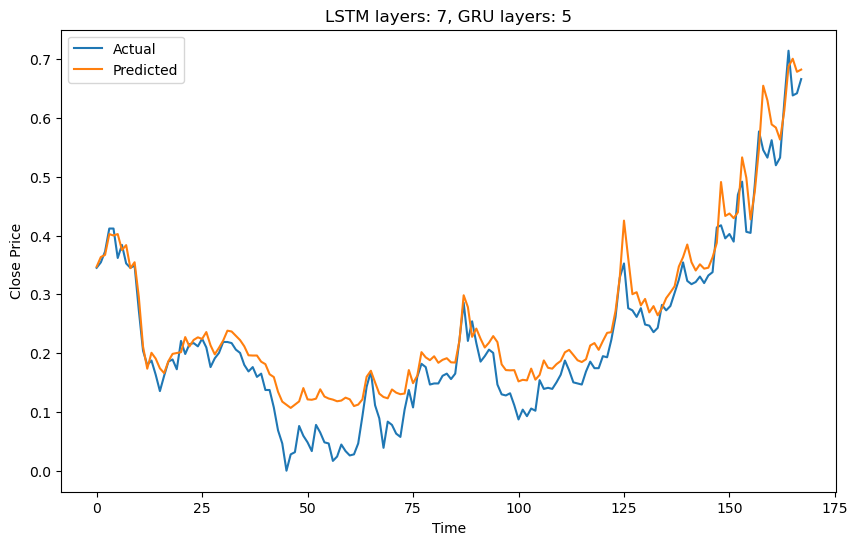

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step


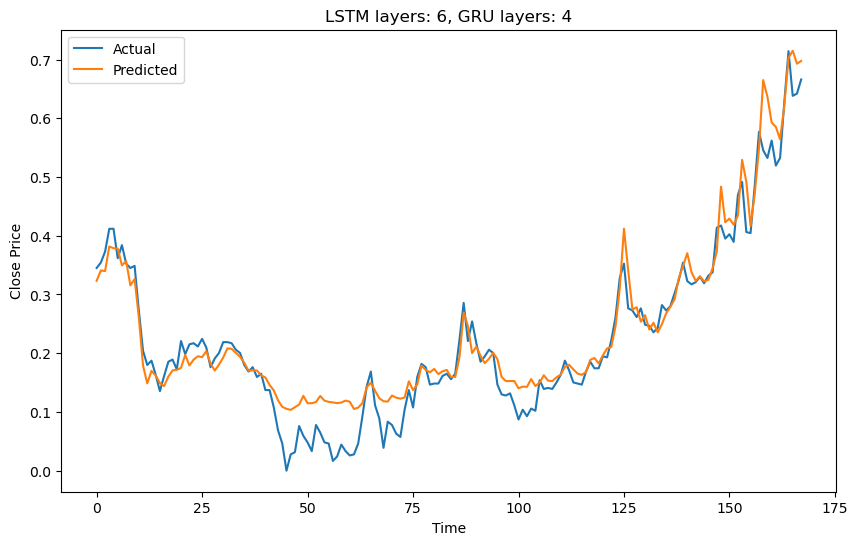

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step


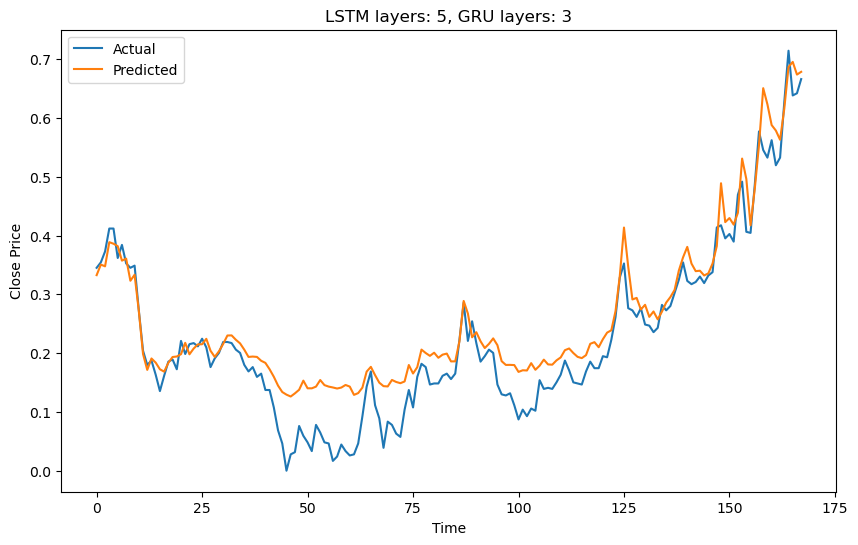

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


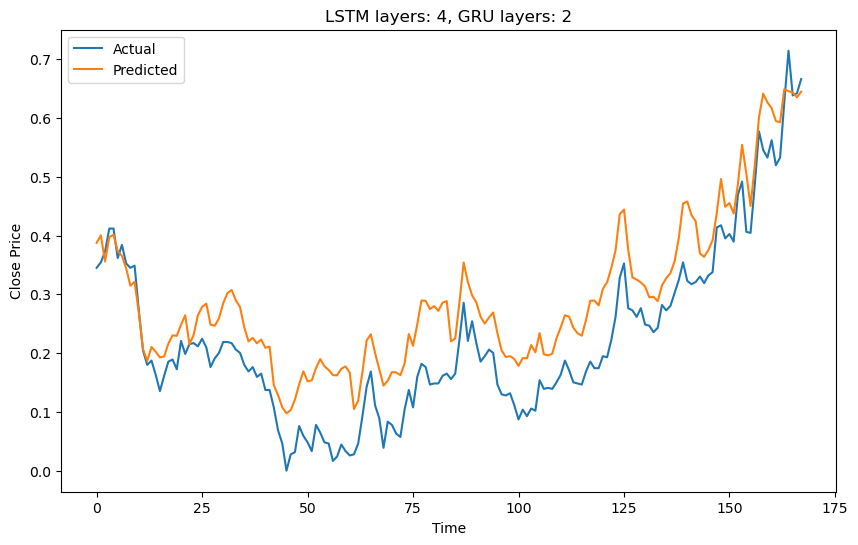

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


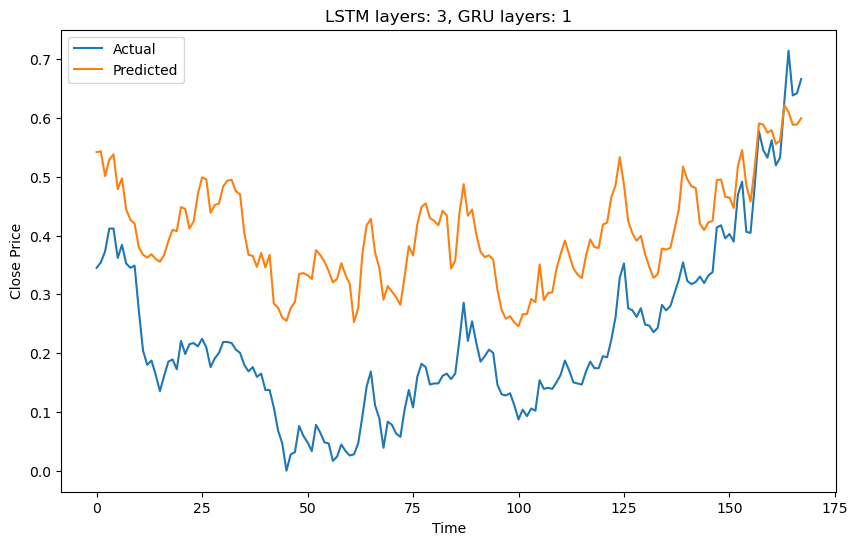

In [115]:
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # validation set
    val_split = int(len(X_train) * 0.8)
    X_train, X_val = X_train[:val_split], X_train[val_split:]
    y_train, y_val = y_train[:val_split], y_train[val_split:]

    # Reshape input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Model configurations for LSTM and GRU layer combinations
    configurations = [
        (9, 7), (8, 6), (7, 5), (6, 4), (5, 3), (4, 2), (3, 1)
    ]

    for lstm_layers, gru_layers in configurations:
        model = GRU_LSTM_Model(lstm_layers=lstm_layers, gru_layers=gru_layers, input_shape=(X_train.shape[1], 1))
        history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=0)

        # Model evaluation
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        results.append((lstm_layers, gru_layers, mse, rmse, mae, mape))

        # Plot for actual vs predicted values
        plt.figure(figsize=(10, 6))
        plt.plot(y_test, label="Actual")
        plt.plot(y_pred, label="Predicted")
        plt.title(f"LSTM layers: {lstm_layers}, GRU layers: {gru_layers}")
        plt.xlabel("Time")
        plt.ylabel("Close Price")
        plt.legend()
        plt.show()

## Model results

In [117]:
results_ = pd.DataFrame(results, columns=["LSTM Layers", "GRU Layers", "MSE", "RMSE", "MAE", "MAPE"])
results_

LSTM Layers  GRU Layers       MSE      RMSE       MAE          MAPE
0             9           7  0.019969  0.141312  0.132704  3.813632e-01
1             8           6  0.021069  0.145151  0.136785  3.937645e-01
2             7           5  0.021951  0.148158  0.139973  4.034532e-01
3             6           4  0.027944  0.167165  0.159989  4.643294e-01
4             5           3  0.019132  0.138317  0.129877  3.732397e-01
5             4           2  0.019060  0.138057  0.130422  3.761778e-01
6             3           1  0.009707  0.098524  0.089602  2.572471e-01
7             9           7  0.031954  0.178757  0.158591  3.526915e-01
8             8           6  0.027902  0.167040  0.145259  3.202076e-01
9             7           5  0.013636  0.116772  0.091781  1.950621e-01
10            6           4  0.002477  0.049772  0.031383  6.550132e-02
11            5           3  0.006644  0.081510  0.061671  1.329142e-01
12            4           2  0.005765  0.075928  0.058895  1.291949e-01
13            3           1  0.002657  0.051545  0.041496  9.520354e-02
14            9           7  0.096523  0.310682  0.294248  4.859788e-01
15            8           6  0.086707  0.294460  0.277091  4.562222e-01
16            7           5  0.044890  0.211874  0.189185  3.047360e-01
17            6           4  0.034882  0.186767  0.164653  2.640993e-01
18            5           3  0.021519  0.146692  0.120684  1.900527e-01
19            4           2  0.042293  0.205652  0.181458  2.925945e-01
20            3           1  0.023716  0.153999  0.123376  1.948488e-01
21            9           7  0.068817  0.262331  0.239916  3.968570e-01
22            8           6  0.010916  0.104480  0.092994  1.562704e-01
23            7           5  0.001732  0.041614  0.032138  5.911003e-02
24            6           4  0.003026  0.055005  0.041432  7.193469e-02
25            5           3  0.006589  0.081171  0.062141  1.074583e-01
26            4           2  0.020349  0.142649  0.123737  2.020659e-01
27            3           1  0.013304  0.115342  0.100521  2.061115e-01
28            9           7  0.053098  0.230429  0.207177  1.079805e+13
29            8           6  0.002211  0.047022  0.035809  3.423065e+12
30            7           5  0.001995  0.044660  0.036308  3.005601e+12
31            6           4  0.001503  0.038763  0.028836  2.826145e+12
32            5           3  0.002524  0.050240  0.039439  3.468244e+12
33            4           2  0.006237  0.078975  0.071388  2.614247e+12
34            3           1  0.039309  0.198266  0.183033  6.829928e+12

## Best model based on RMSE and MSE

In [119]:
best_model = results_.loc[results_['RMSE'].idxmin()]
print("Best Model Configuration based on RMSE:")
best_model

Best Model Configuration based on RMSE:


LSTM Layers    6.000000e+00
GRU Layers     4.000000e+00
MSE            1.502605e-03
RMSE           3.876345e-02
MAE            2.883629e-02
MAPE           2.826145e+12
Name: 31, dtype: float64